# Fixed Income Quantitative Trading HW1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### a. Load data into pandas dataframe

In [12]:
data = pd.read_excel('Treasury Yield.xlsx', index_col = 'Date')

In [13]:
data.head()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


### b. Remove ‘1M’ column and use the date from 1998-2016 

Since that the 2 Mo column are all NA, we also remove this column so that it could be easy for us to calculate diff, corr and vol in the following steps.

In [14]:
data.drop(columns = ['1 Mo', '2 Mo'], inplace = True)

In [15]:
data_new = data['1998-01-01':'2016-12-31']

In [16]:
data_new.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
1998-01-02,5.32,5.40,5.46,5.59,5.62,5.63,5.68,5.67,5.94,5.86
1998-01-05,5.23,5.32,5.35,5.47,5.47,5.46,5.52,5.52,5.82,5.74
1998-01-06,5.22,5.30,5.30,5.39,5.42,5.41,5.49,5.49,5.80,5.73
1998-01-07,5.23,5.30,5.31,5.42,5.45,5.45,5.55,5.55,5.88,5.80
1998-01-08,5.13,5.20,5.20,5.31,5.33,5.34,5.46,5.49,5.82,5.75


In [17]:
data_new.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2016-12-23,0.52,0.65,0.87,1.22,1.54,2.04,2.35,2.55,2.86,3.12
2016-12-27,0.51,0.66,0.89,1.28,1.58,2.07,2.37,2.57,2.88,3.14
2016-12-28,0.53,0.62,0.90,1.26,1.55,2.02,2.32,2.51,2.83,3.09
2016-12-29,0.47,0.62,0.85,1.22,1.49,1.96,2.30,2.49,2.82,3.08
2016-12-30,0.51,0.62,0.85,1.20,1.47,1.93,2.25,2.45,2.79,3.06


### c. Construct series of daily differences

In [18]:
data_diff = data_new.diff()

In [26]:
data_diff.drop(data_diff.index[0], inplace = True)

In [27]:
data_diff.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
1998-01-05,-0.09,-0.08,-0.11,-0.12,-0.15,-0.17,-0.16,-0.15,-0.12,-0.12
1998-01-06,-0.01,-0.02,-0.05,-0.08,-0.05,-0.05,-0.03,-0.03,-0.02,-0.01
1998-01-07,0.01,0.00,0.01,0.03,0.03,0.04,0.06,0.06,0.08,0.07
1998-01-08,-0.10,-0.10,-0.11,-0.11,-0.12,-0.11,-0.09,-0.06,-0.06,-0.05
1998-01-09,-0.08,-0.09,-0.12,-0.14,-0.13,-0.12,-0.09,-0.09,-0.05,-0.04


### d. Compute correlations and volatilities among the series (using level data)

In [29]:
data_corr_level = data_new.corr()
data_corr_level

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.998474,0.994831,0.981020,0.965991,0.930395,0.897358,0.858808,0.777356,0.836837
6 Mo,0.998474,1.000000,0.998064,0.985813,0.971125,0.935369,0.901603,0.862994,0.779952,0.837599
1 Yr,0.994831,0.998064,1.000000,0.993338,0.981841,0.950010,0.918233,0.880892,0.800086,0.847686
2 Yr,0.981020,0.985813,0.993338,1.000000,0.996518,0.975633,0.950672,0.916565,0.842489,0.874898
3 Yr,0.965991,0.971125,0.981841,0.996518,1.000000,0.989703,0.971020,0.941514,0.874408,0.894447
5 Yr,0.930395,0.935369,0.950010,0.975633,0.989703,1.000000,0.994435,0.977402,0.927013,0.932308
7 Yr,0.897358,0.901603,0.918233,0.950672,0.971020,0.994435,1.000000,0.992506,0.957795,0.958027
10 Yr,0.858808,0.862994,0.880892,0.916565,0.941514,0.977402,0.992506,1.000000,0.982792,0.980511
20 Yr,0.777356,0.779952,0.800086,0.842489,0.874408,0.927013,0.957795,0.982792,1.000000,0.994971
30 Yr,0.836837,0.837599,0.847686,0.874898,0.894447,0.932308,0.958027,0.980511,0.994971,1.000000


In [31]:
data_vol_level = data_new.std()
data_vol_level

3 Mo     2.100867
6 Mo     2.125534
1 Yr     2.072415
2 Yr     1.997175
3 Yr     1.881481
5 Yr     1.660711
7 Yr     1.517478
10 Yr    1.327459
20 Yr    1.262964
30 Yr    1.141953
dtype: float64

### e. Compute correlations and volatilities among the series (using daily differences)

In [32]:
data_corr_diff = data_diff.corr()
data_corr_diff

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.767921,0.595915,0.367397,0.329247,0.274581,0.232599,0.205383,0.156063,0.139239
6 Mo,0.767921,1.000000,0.819384,0.576529,0.532568,0.461739,0.405949,0.369554,0.299901,0.257625
1 Yr,0.595915,0.819384,1.000000,0.810699,0.762512,0.683485,0.619514,0.571969,0.482837,0.410516
2 Yr,0.367397,0.576529,0.810699,1.000000,0.951802,0.887326,0.824188,0.769853,0.663140,0.588832
3 Yr,0.329247,0.532568,0.762512,0.951802,1.000000,0.944469,0.893232,0.845369,0.743121,0.676943
5 Yr,0.274581,0.461739,0.683485,0.887326,0.944469,1.000000,0.967855,0.936032,0.852927,0.800068
7 Yr,0.232599,0.405949,0.619514,0.824188,0.893232,0.967855,1.000000,0.971868,0.914288,0.872325
10 Yr,0.205383,0.369554,0.571969,0.769853,0.845369,0.936032,0.971868,1.000000,0.950530,0.921481
20 Yr,0.156063,0.299901,0.482837,0.663140,0.743121,0.852927,0.914288,0.950530,1.000000,0.976995
30 Yr,0.139239,0.257625,0.410516,0.588832,0.676943,0.800068,0.872325,0.921481,0.976995,1.000000


In [33]:
data_vol_diff = data_diff.std()
data_vol_diff

3 Mo     0.051948
6 Mo     0.041469
1 Yr     0.041751
2 Yr     0.054433
3 Yr     0.058449
5 Yr     0.062394
7 Yr     0.062952
10 Yr    0.059746
20 Yr    0.056070
30 Yr    0.054872
dtype: float64

### f. Plot the volatility curves computed in 2d & 2e

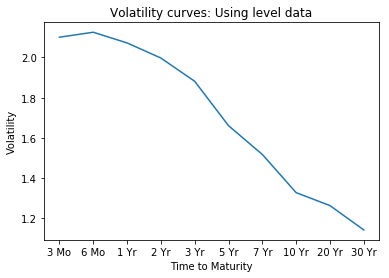

In [36]:
plt.plot(data_vol_level.index, data_vol_level.values)
plt.title('Volatility curves: Using level data')
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.show()


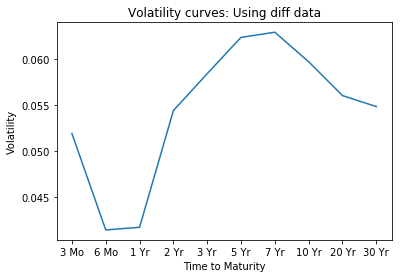

In [37]:
plt.plot(data_vol_diff.index, data_vol_diff.values)
plt.title('Volatility curves: Using diff data')
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.show()
